# A Detailed Analysis of the World University Rankings

This project is a detailed analysis of the World University Rankings. The datset is obtained from Kaggle [https://www.kaggle.com/mylesoneill/world-university-rankings]. This project analyses the contributing factors for world university ranking system introduced by The Center for World University Rankings. This project was done from the knowledge acquired through the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com). The data analysis were supported by library function from Pandas/Numpy/Matplotlib/Seaborn.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

The datset is obtained from Kaggle [https://www.kaggle.com/mylesoneill/world-university-rankings].

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/mylesoneill/world-university-rankings' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aparnaharichandran
Your Kaggle Key: ········


100%|██████████| 1.41M/1.41M [00:00<00:00, 85.1MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './world-university-rankings'

In [5]:
import os
os.listdir(data_dir)

['cwurData.csv',
 'school_and_country_table.csv',
 'educational_attainment_supplementary_data.csv',
 'timesData.csv',
 'education_expenditure_supplementary_data.csv',
 'shanghaiData.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "zerotopandas-course-project-aparna" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aparnaharichandran/zerotopandas-course-project-aparna" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aparnaharichandran/zerotopandas-course-project-aparna


'https://jovian.ml/aparnaharichandran/zerotopandas-course-project-aparna'

## Data Preparation and Cleaning

Data preparation and cleaning were done using Pandas. 



Loading the dataset and visualising it.

In [10]:
import pandas as pd
uni_ranking_raw_df = pd.read_csv('world-university-rankings/cwurData.csv')
uni_ranking_raw_df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


Visualising the name of the columns of the dataset.

In [11]:
uni_ranking_raw_df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

Visualising the total number of raws and columns of the dataset.

In [12]:
uni_ranking_raw_df.shape

(2200, 14)

Inspecting the overall statistical features of the dataset.

In [13]:
uni_ranking_raw_df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


Selecting required columns from the dataset.

In [14]:
selected_columns = [
    'world_rank', 
    'institution', 
    'country', 
    'national_rank',
    'quality_of_education', 
    'alumni_employment', 
    'quality_of_faculty',
    'publications', 
    'influence', 
    'citations', 
    'patents',
    'score', 
    'year'
]

In [15]:
len(selected_columns)

13

Looks like there are rankings for different years. To compare the values, we need to select the rankings in the latest reported year (2015).

In [16]:
ranking_2015_df = uni_ranking_raw_df[uni_ranking_raw_df.year == 2015].copy()
ranking_2015_df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
1200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015
1201,2,Stanford University,USA,2,9,2,4,5,3,3,4.0,10,98.66,2015
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,97.54,2015
1203,4,University of Cambridge,United Kingdom,1,2,10,5,11,6,12,13.0,48,96.81,2015
1204,5,University of Oxford,United Kingdom,2,7,13,10,7,12,7,9.0,15,96.46,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [17]:
uni_ranking_df = ranking_2015_df[selected_columns].copy()
uni_ranking_df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
1200,1,Harvard University,USA,1,1,1,1,1,1,1,3,100.00,2015
1201,2,Stanford University,USA,2,9,2,4,5,3,3,10,98.66,2015
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,1,97.54,2015
1203,4,University of Cambridge,United Kingdom,1,2,10,5,11,6,12,48,96.81,2015
1204,5,University of Oxford,United Kingdom,2,7,13,10,7,12,7,15,96.46,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,651,44.02,2015


Viewing the basic information about the selected subset of the data set.

In [18]:
uni_ranking_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1200 to 2199
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            1000 non-null   int64  
 1   institution           1000 non-null   object 
 2   country               1000 non-null   object 
 3   national_rank         1000 non-null   int64  
 4   quality_of_education  1000 non-null   int64  
 5   alumni_employment     1000 non-null   int64  
 6   quality_of_faculty    1000 non-null   int64  
 7   publications          1000 non-null   int64  
 8   influence             1000 non-null   int64  
 9   citations             1000 non-null   int64  
 10  patents               1000 non-null   int64  
 11  score                 1000 non-null   float64
 12  year                  1000 non-null   int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 109.4+ KB


Looks like there are no missing values in the selected dataset since the non-null count for all category is equal to the total number of raws. Let's look at some sample datapoints.

In [19]:
uni_ranking_df.sample(10)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
1717,518,Yokohama National University,Japan,28,88,217,135,909,865,645,440,44.72,2015
2021,822,University of Perpignan Via Domitia,France,40,160,567,218,974,580,428,871,44.21,2015
1310,111,University of Helsinki,Finland,1,56,551,111,80,79,88,420,50.04,2015
1776,577,Tampere University of Technology,Finland,7,367,156,218,816,646,645,746,44.56,2015
1736,537,University of Tartu,Estonia,1,365,567,218,586,318,368,426,44.68,2015
1818,619,Kagoshima University,Japan,36,367,281,218,733,706,511,251,44.48,2015
1998,799,University of Murcia,Spain,29,367,567,218,541,703,428,479,44.24,2015
1286,87,Utrecht University,Netherlands,2,84,199,115,39,44,59,429,51.74,2015
2009,810,Nanjing University of Technology,China,49,367,567,218,748,984,812,217,44.22,2015
1558,359,University of New Hampshire,USA,126,367,318,79,531,273,234,596,45.42,2015


Most of the values are rankings for the universities for a particular category, hence the values might not require further cleaning. 

Now, let's look at the correlation between alumni employment and quality of education. An additional column is created for 'employment-to-education-quality'. This is the ratio of the ranks for alumni employment to education quality. 
If the ratio is less than 1, it means that for the given education quality the alumni got better employment. If it is more than 1, it roughly indicates that alumni did not get employed as per the quality of education received. If the ratio is 1, it means the alumni recived employment at par with the education quality.

In [20]:
uni_ranking_df['employment_to_education_quality'] = uni_ranking_df.alumni_employment/uni_ranking_df.quality_of_education
uni_ranking_df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,employment_to_education_quality
1200,1,Harvard University,USA,1,1,1,1,1,1,1,3,100.00,2015,1.000000
1201,2,Stanford University,USA,2,9,2,4,5,3,3,10,98.66,2015,0.222222
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,1,97.54,2015,3.666667
1203,4,University of Cambridge,United Kingdom,1,2,10,5,11,6,12,48,96.81,2015,5.000000
1204,5,University of Oxford,United Kingdom,2,7,13,10,7,12,7,15,96.46,2015,1.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,816,44.03,2015,1.544959
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,871,44.03,2015,2.398305
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,824,44.03,2015,1.495913
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,651,44.02,2015,1.544959


Similarly, let's look at the correlation between quality of faculty	and publications. 
An additional column is created for 'publications-to-faculty-quality'. This is the ratio of the ranks for publications to faculty quality. 
If the ratio is less than 1, it means that for the given faculty quality the university got better publication. If it is more than 1, it roughly indicates that quality / quantum of publications were less compared to the quality of faculty. If the ratio is 1, it means the publications are at par with the education quality.

In [21]:
uni_ranking_df['publications_to_faculty_quality'] = uni_ranking_df.publications/uni_ranking_df.quality_of_faculty
uni_ranking_df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,employment_to_education_quality,publications_to_faculty_quality
1200,1,Harvard University,USA,1,1,1,1,1,1,1,3,100.00,2015,1.000000,1.000000
1201,2,Stanford University,USA,2,9,2,4,5,3,3,10,98.66,2015,0.222222,1.250000
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,1,97.54,2015,3.666667,7.500000
1203,4,University of Cambridge,United Kingdom,1,2,10,5,11,6,12,48,96.81,2015,5.000000,2.200000
1204,5,University of Oxford,United Kingdom,2,7,13,10,7,12,7,15,96.46,2015,1.857143,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,816,44.03,2015,1.544959,4.247706
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,871,44.03,2015,2.398305,4.573394
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,824,44.03,2015,1.495913,3.807339
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,651,44.02,2015,1.544959,4.064220


In [22]:
import jovian

In [23]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aparnaharichandran/zerotopandas-course-project-aparna" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aparnaharichandran/zerotopandas-course-project-aparna


'https://jovian.ml/aparnaharichandran/zerotopandas-course-project-aparna'

## Exploratory Analysis and Visualization

This section explores the overall characteristics of the dataset.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Country** - Which countries have the best universities in the world? First look at how many countries are in the dataset and plot the top 15 countires having the best universities.

In [25]:
uni_ranking_df.country.nunique()

59

Identify the top countries having the best institutes.

In [26]:
top_countries = uni_ranking_df.country.value_counts().head(15)
top_countries

USA               229
China              83
Japan              74
United Kingdom     65
Germany            55
France             49
Italy              47
Spain              40
South Korea        36
Canada             33
Australia          27
Taiwan             21
Brazil             18
India              16
Netherlands        13
Name: country, dtype: int64

This data can be visualised in the form of bar charts.

<AxesSubplot:title={'center':'The top 15 countires having the best universities in the world'}, ylabel='country'>

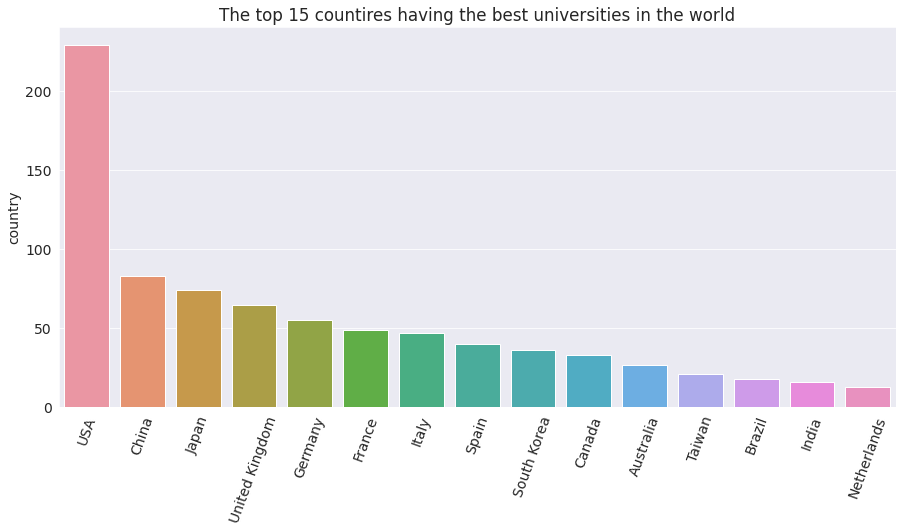

In [27]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=70)
plt.title('The top 15 countires having the best universities in the world')
sns.barplot(top_countries.index,top_countries)

It can be observed that a vast majority of the best universities in the world are from the USA. This can be the reason for USA being one of the most favorite destination for international students.

**Score** - How are the total scores of the universities distributed? 

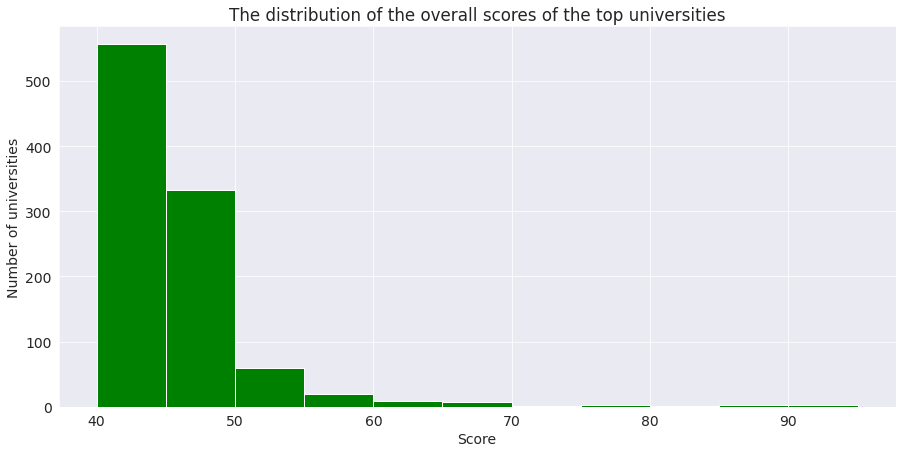

In [28]:
import numpy as np
plt.figure(figsize=(15,7))
plt.title('The distribution of the overall scores of the top universities')
plt.xlabel('Score')
plt.ylabel('Number of universities')
plt.hist(uni_ranking_df.score, bins=np.arange(40,100,5), color = 'green');

Looks like most of the univeristies have the overall score in the rage of 40 - 50. Only few of the univerties have overall scores above 70.

**Patents vs Score** - What is influence of patent ranking in overall score of the universities?

Text(0, 0.5, 'Overall University score')

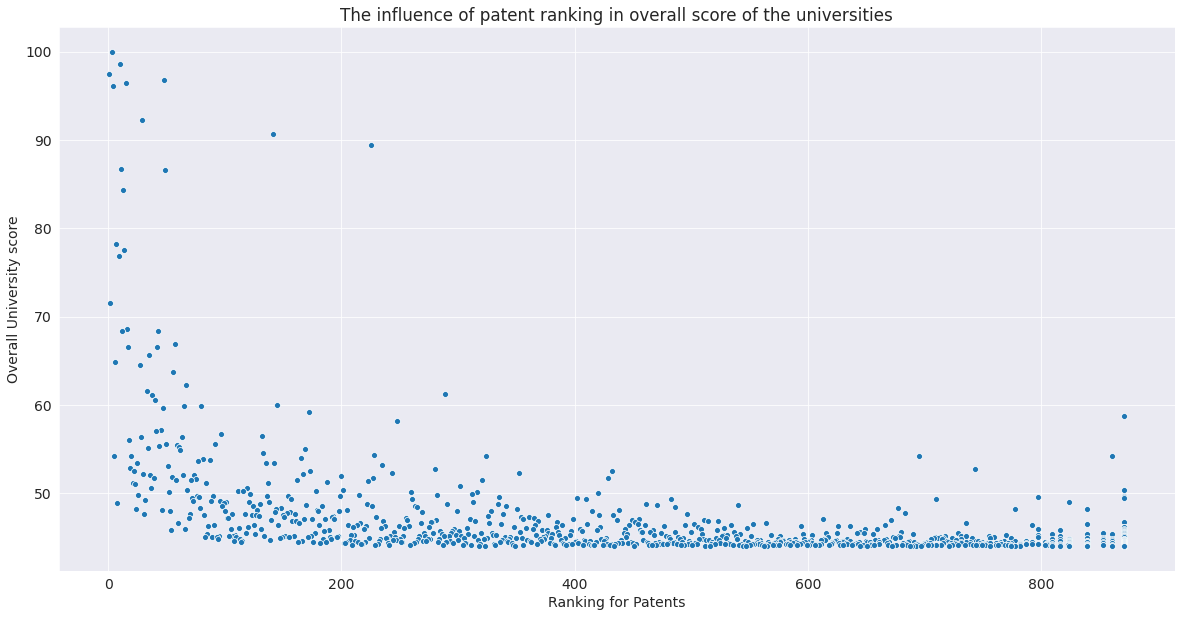

In [29]:
plt.figure(figsize=(20,10))
plt.title('The influence of patent ranking in overall score of the universities')
sns.scatterplot(uni_ranking_df.patents,uni_ranking_df.score)
plt.xlabel('Ranking for Patents')
plt.ylabel('Overall University score')

It can be clearly seen that the universities with high ranking in patents have high overall scores. 

**Employment vs Infuence** - What is influence of alumni employment in overall score of the universities?

Text(0, 0.5, 'Overall University score')

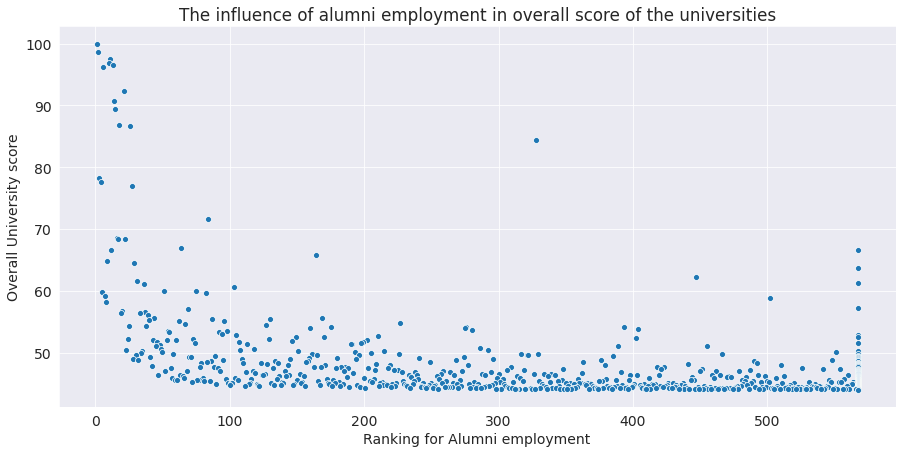

In [30]:
plt.figure(figsize=(15,7))
plt.title('The influence of alumni employment in overall score of the universities')
sns.scatterplot(uni_ranking_df.alumni_employment,uni_ranking_df.score)
plt.xlabel('Ranking for Alumni employment')
plt.ylabel('Overall University score')

The figure shows clearly how universities with high ranking in alumni employment also have high overall score.

The distribution of Publications to faculty quality ratio is explored.

Text(0, 0.5, 'Total number of universities')

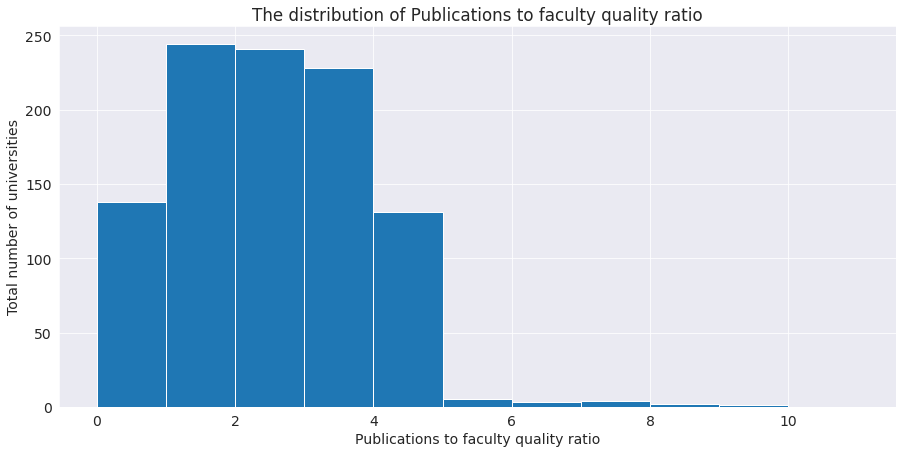

In [31]:
plt.figure(figsize=(15,7))
plt.title('The distribution of Publications to faculty quality ratio')
plt.hist(uni_ranking_df.publications_to_faculty_quality, bins=np.arange(0,12,1))
plt.xlabel('Publications to faculty quality ratio')
plt.ylabel('Total number of universities')

This distribution shows that among the universities in the world, only a small fraction produce quality publications at par or more than the quality of the faculty members. It is indicated by the number of universities whose publications to faculty ratio less than or equal to 1.

Let us save and upload our work to Jovian before continuing

In [32]:
import jovian

In [33]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aparnaharichandran/zerotopandas-course-project-aparna" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aparnaharichandran/zerotopandas-course-project-aparna


'https://jovian.ml/aparnaharichandran/zerotopandas-course-project-aparna'

## Asking and Answering Questions

This section asks and answers some critical questions about the dataset.



#### Q1: How many Indian universitires are there in the top universities and what is the highest score among the Indian universities?

In [34]:
top_indian_uni = uni_ranking_df[uni_ranking_df.country == 'India']
count_top_indian_uni = top_indian_uni.country.count()
highscore_top_indian_uni = top_indian_uni.score.max()
name_top_indian_uni = top_indian_uni[top_indian_uni.score == highscore_top_indian_uni].institution
top_indian_uni

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,employment_to_education_quality,publications_to_faculty_quality
1540,341,Indian Institute of Technology Delhi,India,1,367,59,218,635,943,812,625,45.54,2015,0.160763,2.912844
1578,379,University of Delhi,India,2,240,72,218,703,763,812,797,45.30,2015,0.300000,3.224771
1647,448,Indian Institute of Science,India,3,367,332,218,315,537,511,239,44.96,2015,0.904632,1.444954
1690,491,Panjab University,India,4,333,167,218,720,786,368,824,44.80,2015,0.501502,3.302752
1733,534,Indian Institute of Technology Madras,India,5,367,147,218,523,943,812,317,44.68,2015,0.400545,2.399083
1795,596,Indian Institute of Technology Bombay,India,6,367,507,218,521,815,645,176,44.52,2015,1.381471,2.389908
1800,601,Tata Institute of Fundamental Research,India,7,367,567,218,468,450,368,792,44.51,2015,1.544959,2.146789
1813,614,Indian Institute of Technology Kharagpur,India,8,367,242,218,500,974,812,644,44.49,2015,0.659401,2.293578
1837,638,Indian Institute of Technology Roorkee,India,9,367,395,218,839,931,428,871,44.44,2015,1.076294,3.848624
1878,679,Banaras Hindu University,India,10,243,260,218,754,904,511,871,44.39,2015,1.069959,3.458716


In [35]:
print('There are {} Indian universities among the top universities in the world.\n\
The highest score of an Indian university is {}'.format(count_top_indian_uni, highscore_top_indian_uni))

There are 16 Indian universities among the top universities in the world.
The highest score of an Indian university is 45.54


Sort the best Indian institutes by score and display the results.
'sort_values' will sort the top institution in India based on the overall university score.

In [36]:
top10_indian_uni = top_indian_uni.sort_values('score', ascending=False).head(10)
top10_indian_uni

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,employment_to_education_quality,publications_to_faculty_quality
1540,341,Indian Institute of Technology Delhi,India,1,367,59,218,635,943,812,625,45.54,2015,0.160763,2.912844
1578,379,University of Delhi,India,2,240,72,218,703,763,812,797,45.30,2015,0.300000,3.224771
1647,448,Indian Institute of Science,India,3,367,332,218,315,537,511,239,44.96,2015,0.904632,1.444954
1690,491,Panjab University,India,4,333,167,218,720,786,368,824,44.80,2015,0.501502,3.302752
1733,534,Indian Institute of Technology Madras,India,5,367,147,218,523,943,812,317,44.68,2015,0.400545,2.399083
1795,596,Indian Institute of Technology Bombay,India,6,367,507,218,521,815,645,176,44.52,2015,1.381471,2.389908
1800,601,Tata Institute of Fundamental Research,India,7,367,567,218,468,450,368,792,44.51,2015,1.544959,2.146789
1813,614,Indian Institute of Technology Kharagpur,India,8,367,242,218,500,974,812,644,44.49,2015,0.659401,2.293578
1837,638,Indian Institute of Technology Roorkee,India,9,367,395,218,839,931,428,871,44.44,2015,1.076294,3.848624
1878,679,Banaras Hindu University,India,10,243,260,218,754,904,511,871,44.39,2015,1.069959,3.458716


#### Q2: Which are the counties having the best university education based on the average univerity score ?
'groupby' is used to cobine the universities based on country and 'mean' is used to compute the average of scores of all universities in a particular country.

In [37]:
top_uni_country = uni_ranking_df.groupby('country')[['score']].mean().sort_values('score', ascending=False).head(10)
top_uni_country

,score
country,
Singapore,51.365000
Israel,51.187143
Switzerland,50.396667
USA,50.110218
Netherlands,48.238462
Denmark,48.054000
United Kingdom,48.004615
Sweden,47.545455
Russia,46.842000


Text(0, 0.5, 'Average university score')

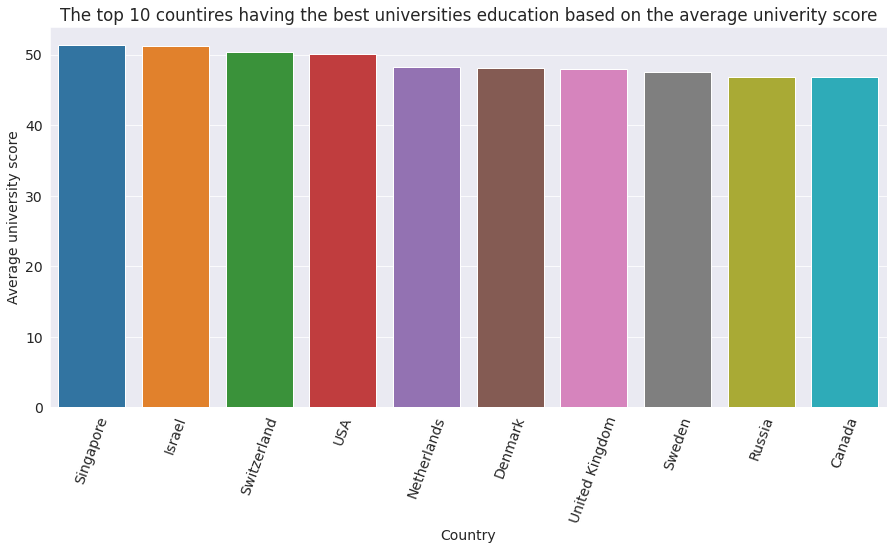

In [38]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=70)
plt.title('The top 10 countires having the best universities education based on the average univerity score')
g = sns.barplot(top_uni_country.score.index,top_uni_country.score)
plt.xlabel('Country')
plt.ylabel('Average university score')

Even though USA is having the most number of best universities in the world, based on the average score for universities in a country, Singapore offers best university education.

#### Q3: What are the 50 most influential universities in the world?  How are they distributed around the world? Wether the quality of education contributes towards their inflence?

In [39]:
top_uni_influence = uni_ranking_df.sort_values('influence', ascending=True).head(50)
top_uni_influence

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,employment_to_education_quality,publications_to_faculty_quality
1200,1,Harvard University,USA,1,1,1,1,1,1,1,3,100.00,2015,1.000000,1.000000
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,1,97.54,2015,3.666667,7.500000
1201,2,Stanford University,USA,2,9,2,4,5,3,3,10,98.66,2015,0.222222,1.250000
1206,7,"University of California, Berkeley",USA,5,5,21,6,10,4,4,29,92.25,2015,4.200000,1.666667
1220,21,"University of California, San Diego",USA,16,36,567,19,16,5,15,17,66.59,2015,15.750000,0.842105
1203,4,University of Cambridge,United Kingdom,1,2,10,5,11,6,12,48,96.81,2015,5.000000,2.200000
1225,26,"University of California, San Francisco",USA,19,367,567,20,22,7,15,56,63.69,2015,1.544959,1.100000
1210,11,Yale University,USA,9,10,26,11,18,8,35,49,86.61,2015,2.600000,1.636364
1211,12,California Institute of Technology,USA,10,6,328,7,53,9,19,13,84.40,2015,54.666667,7.571429
1230,31,University of Washington - Seattle,USA,23,48,103,41,9,10,10,40,60.61,2015,2.145833,0.219512


Text(0, 0.5, 'Ranking for Education quality')

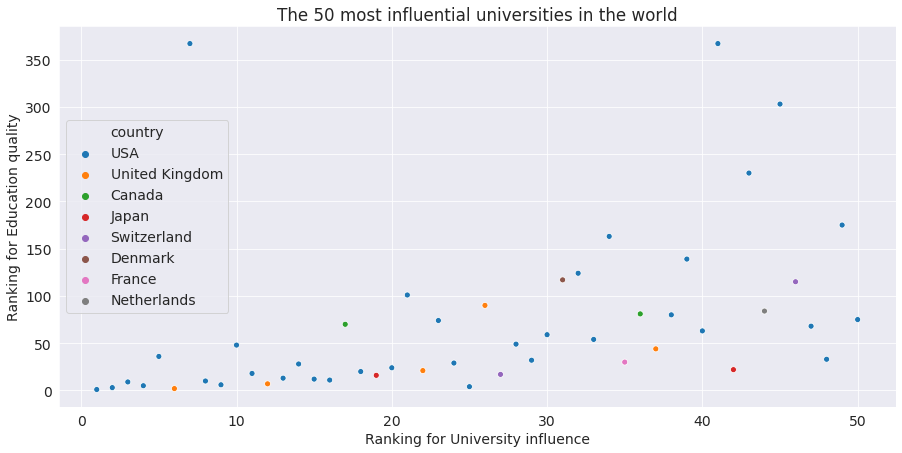

In [40]:
plt.figure(figsize=(15,7))
plt.title('The 50 most influential universities in the world')
sns.scatterplot(top_uni_influence.influence,top_uni_influence.quality_of_education, hue = top_uni_influence.country)
plt.xlabel('Ranking for University influence')
plt.ylabel('Ranking for Education quality')

It looks like the quality of education offered by a university contributes a lot towards its influence in the world.

In [41]:
top_uni_influence_count = top_uni_influence.country.value_counts()
top_uni_influence_count

USA               36
United Kingdom     5
Switzerland        2
Japan              2
Canada             2
Denmark            1
Netherlands        1
France             1
Name: country, dtype: int64

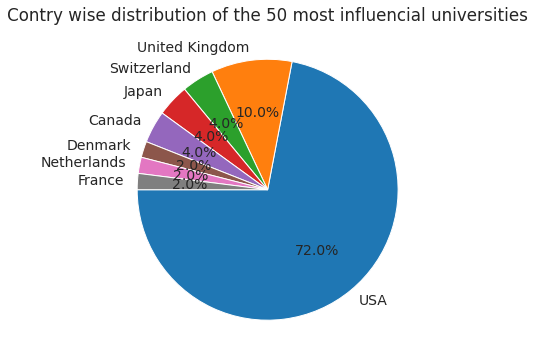

In [42]:
plt.figure(figsize=(12,6))
plt.title('Contry wise distribution of the 50 most influencial universities')
plt.pie(top_uni_influence_count, labels=top_uni_influence_count.index, autopct='%1.1f%%', startangle=180);

From the pie chart, it is clear that almost three quarters of the 50 most influential universities in the world belong to the USA.

#### Q4: Which countries have the best universities based on publication?

In [43]:
top_uni_pub = uni_ranking_df.sort_values('publications', ascending=True).head(50)
top_uni_pub

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,employment_to_education_quality,publications_to_faculty_quality
1200,1,Harvard University,USA,1,1,1,1,1,1,1,3,100.00,2015,1.000000,1.000000
1231,32,University of Toronto,Canada,1,70,51,32,2,17,9,145,60.04,2015,0.728571,0.062500
1218,19,"University of Michigan, Ann Arbor",USA,15,24,17,140,3,20,6,12,68.36,2015,0.708333,0.021429
1215,16,Johns Hopkins University,USA,13,18,84,16,4,11,5,2,71.60,2015,4.666667,0.250000
1201,2,Stanford University,USA,2,9,2,4,5,3,3,10,98.66,2015,0.222222,1.250000
1214,15,"University of California, Los Angeles",USA,12,28,27,13,6,14,8,9,76.91,2015,0.964286,0.461538
1204,5,University of Oxford,United Kingdom,2,7,13,10,7,12,7,15,96.46,2015,1.857143,0.700000
1213,14,University of Pennsylvania,USA,11,20,4,28,8,18,14,14,77.60,2015,0.200000,0.285714
1230,31,University of Washington - Seattle,USA,23,48,103,41,9,10,10,40,60.61,2015,2.145833,0.219512
1206,7,"University of California, Berkeley",USA,5,5,21,6,10,4,4,29,92.25,2015,4.200000,1.666667


In [44]:
top_uni_pub_count = top_uni_pub.country.value_counts()
top_uni_pub_count

USA               29
United Kingdom     5
Japan              3
Canada             3
Australia          2
Netherlands        1
Denmark            1
Singapore          1
France             1
South Korea        1
Switzerland        1
Taiwan             1
Belgium            1
Name: country, dtype: int64

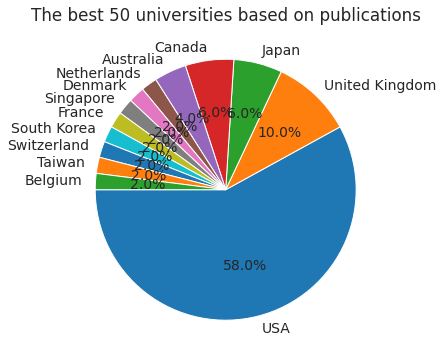

In [45]:
plt.figure(figsize=(12,6))
plt.title('The best 50 universities based on publications')
plt.pie(top_uni_pub_count, labels=top_uni_pub_count.index, autopct='%1.1f%%', startangle=180);

More than half of the top 50 univeritries which produce the best publications in the world are from the USA.

#### Q5: From which country the universities produce the most patents?

In [46]:
top_uni_pat = uni_ranking_df.sort_values('patents', ascending=True).head(50)
top_uni_pat

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,employment_to_education_quality,publications_to_faculty_quality
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,1,97.54,2015,3.666667,7.500000
1215,16,Johns Hopkins University,USA,13,18,84,16,4,11,5,2,71.60,2015,4.666667,0.250000
1200,1,Harvard University,USA,1,1,1,1,1,1,1,3,100.00,2015,1.000000,1.000000
1205,6,Columbia University,USA,4,13,6,9,13,13,11,4,96.14,2015,0.461538,1.444444
1259,60,University of Florida,USA,38,214,276,96,37,73,46,5,54.18,2015,1.289720,0.385417
1223,24,Seoul National University,South Korea,1,367,9,218,36,163,146,6,64.82,2015,0.024523,0.165138
1212,13,University of Tokyo,Japan,1,16,3,38,14,19,31,7,78.23,2015,0.187500,0.368421
1343,144,Korea Advanced Institute of Science and Techno...,South Korea,4,367,194,218,183,283,368,8,48.95,2015,0.528610,0.839450
1214,15,"University of California, Los Angeles",USA,12,28,27,13,6,14,8,9,76.91,2015,0.964286,0.461538
1201,2,Stanford University,USA,2,9,2,4,5,3,3,10,98.66,2015,0.222222,1.250000


In [47]:
top_uni_pat_count = top_uni_pat.country.value_counts()
top_uni_pat_count

USA               28
South Korea        6
Japan              5
United Kingdom     3
Israel             3
Singapore          2
China              2
Denmark            1
Name: country, dtype: int64

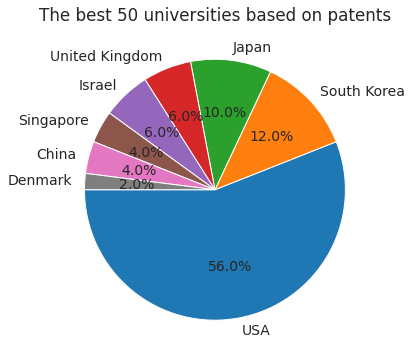

In [48]:
plt.figure(figsize=(12,6))
plt.title('The best 50 universities based on patents')
plt.pie(top_uni_pat_count, labels=top_uni_pat_count.index, autopct='%1.1f%%', startangle=180);

More than half of the top 50 univeritries which produce the most patents in the world are from the USA.

Let us save and upload our work to Jovian before continuing.

In [49]:
import jovian

In [50]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aparnaharichandran/zerotopandas-course-project-aparna" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aparnaharichandran/zerotopandas-course-project-aparna


'https://jovian.ml/aparnaharichandran/zerotopandas-course-project-aparna'

## Inferences and Conclusion

A vast majority of the best universities in the world are from the USA.
Most of the univeristies have the overall score in the rage of 40 - 50. 
Only few of the univerties have overall scores above 70.
Universities with high ranking in patents have high overall scores.
Universities with high ranking in alumni employment also have high overall score.
Among the universities in the world, only a small fraction produce quality publications at par or more than the quality of the faculty members.
There are only 16 Indian universities among the top universities in the world.
Based on the average score for universities in a country, Singapore offers best university education.
The quality of education offered by a university contributes a lot towards its influence in the world.
Almost three quarters of the 50 most influential universities in the world belong to the USA.
More than half of the top 50 univeritries which produce the best publications in the world are from the USA.
More than half of the top 50 univeritries which produce the most patents in the world are from the USA.

In [51]:
import jovian

In [52]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aparnaharichandran/zerotopandas-course-project-aparna" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aparnaharichandran/zerotopandas-course-project-aparna


'https://jovian.ml/aparnaharichandran/zerotopandas-course-project-aparna'

## References and Future Work

The course content required to complete this project can be referred from: [Data Analysis with Python: Zero to Pandas](zerotopandas.com).
The data set can be downloaded from:[https://www.kaggle.com/mylesoneill/world-university-rankings].

In [53]:
import jovian

In [54]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aparnaharichandran/zerotopandas-course-project-aparna" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aparnaharichandran/zerotopandas-course-project-aparna


'https://jovian.ml/aparnaharichandran/zerotopandas-course-project-aparna'